# KNN Clasificatoin

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_error,PredictionErrorDisplay
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor

from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
df = pd.read_csv('Crop_recommendation.csv')

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [33]:
df_filter = df.drop(df[(df.label == 'blackgram') \
                       | (df.label == 'mungbean') \
                       | (df.label == 'lentil') \
                       | (df.label == 'pigeonpeas') \
                       | (df.label == 'coconut') \
                       | (df.label == 'kidneybeans') \
                       | (df.label == 'apple') \
                       | (df.label == 'muskmelon') \
                       | (df.label == 'watermelon') \
                       | (df.label == 'jute')].index)
df_filter = df_filter.drop(columns=['temperature','humidity','ph','rainfall'])
df_filter.head()
df_filter.shape

(1200, 4)

In [34]:
X = df_filter.drop(columns = ['label'])
y = df_filter['label'].to_numpy()

In [35]:
clf = KNeighborsClassifier(n_neighbors=15)
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [36]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    print(accuracy_score(y[test], clf.predict(X.iloc[test])))

0.9666666666666667
0.9833333333333333
0.9833333333333333
0.9666666666666667
0.9416666666666667
0.9583333333333334
0.9666666666666667
0.975
0.975
0.9916666666666667


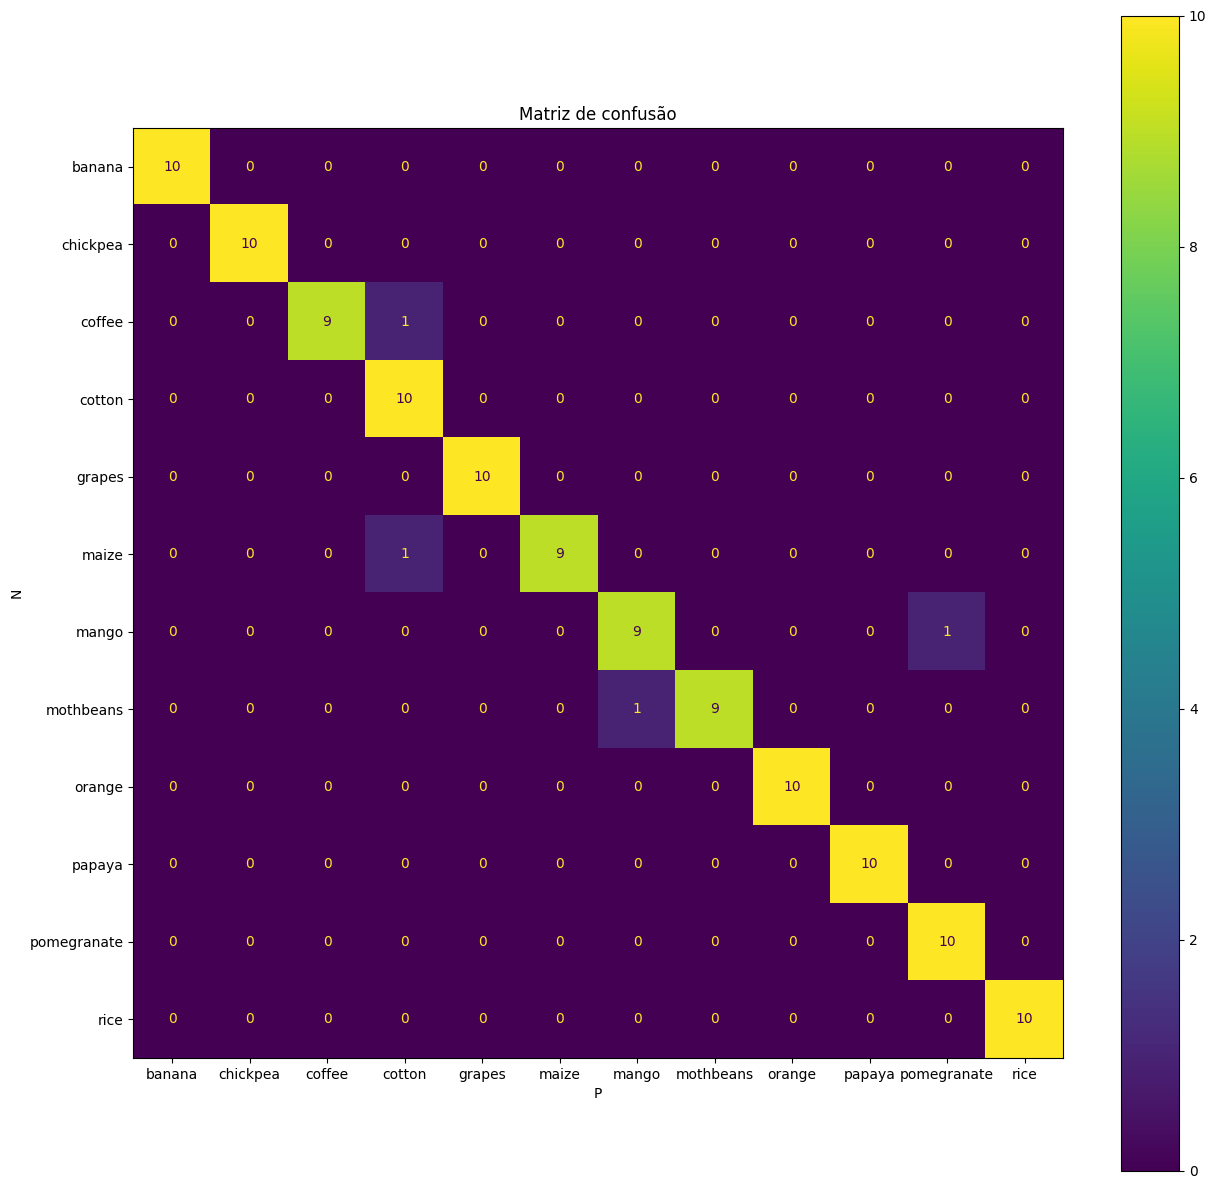

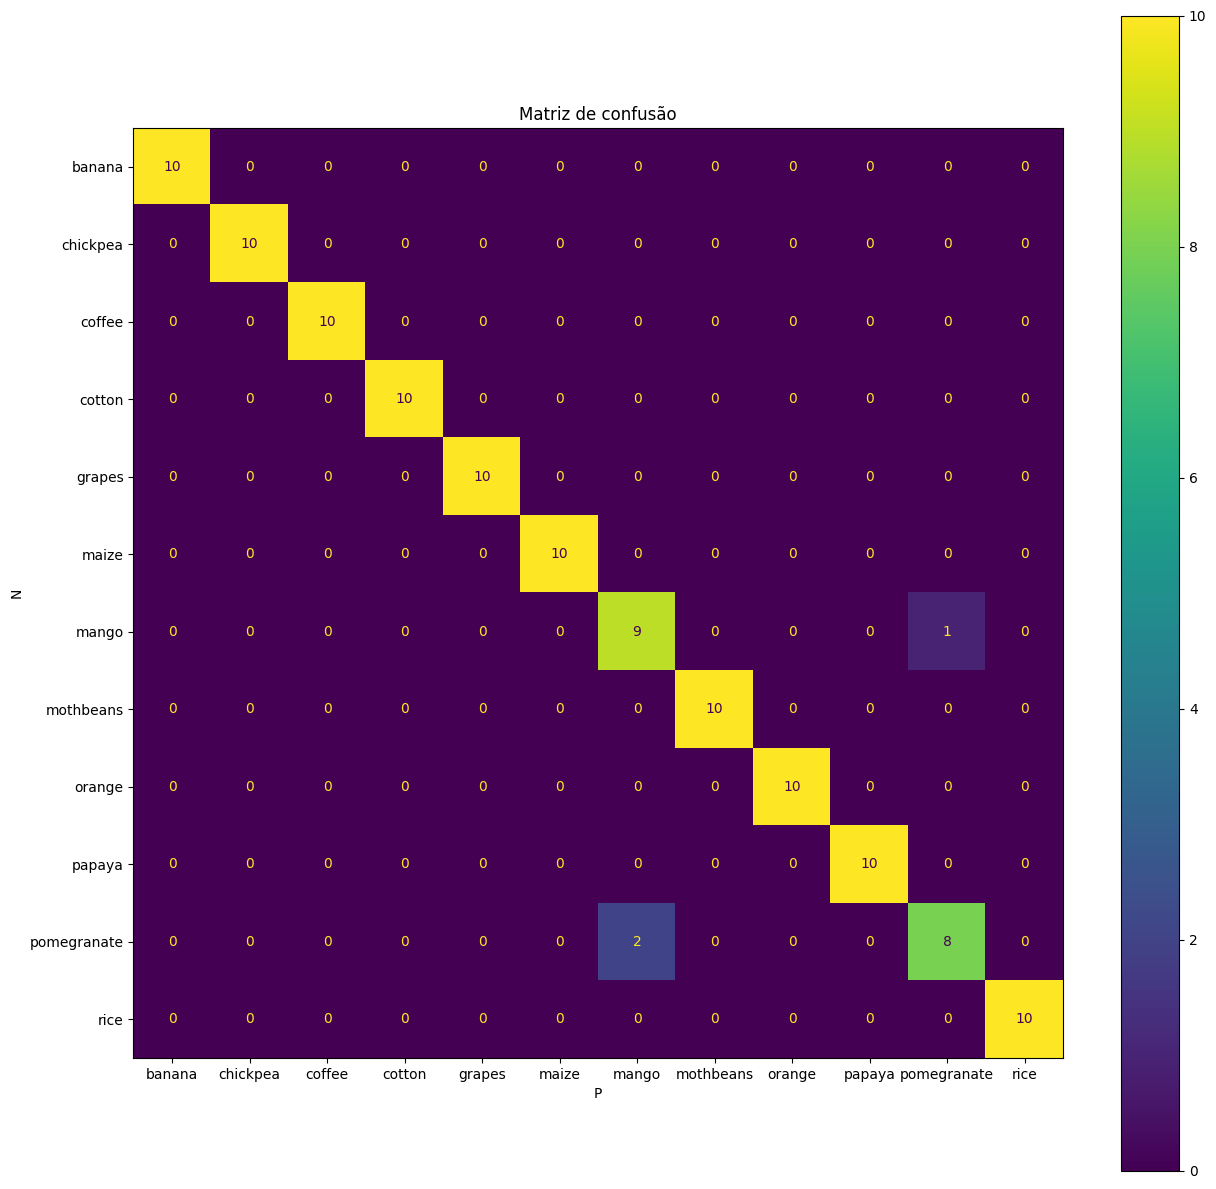

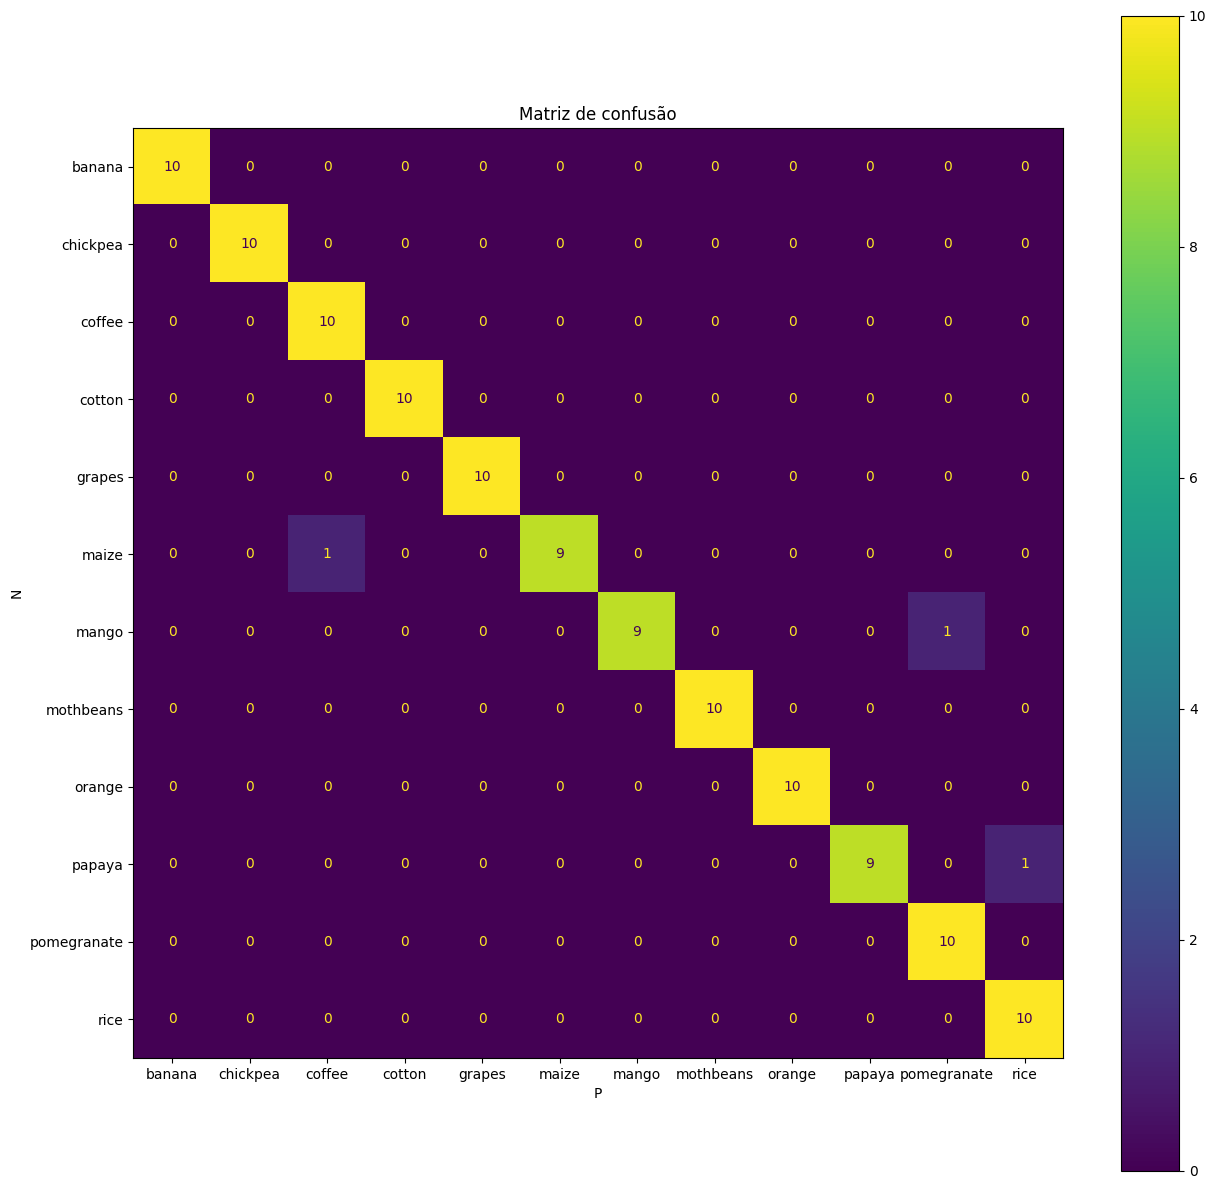

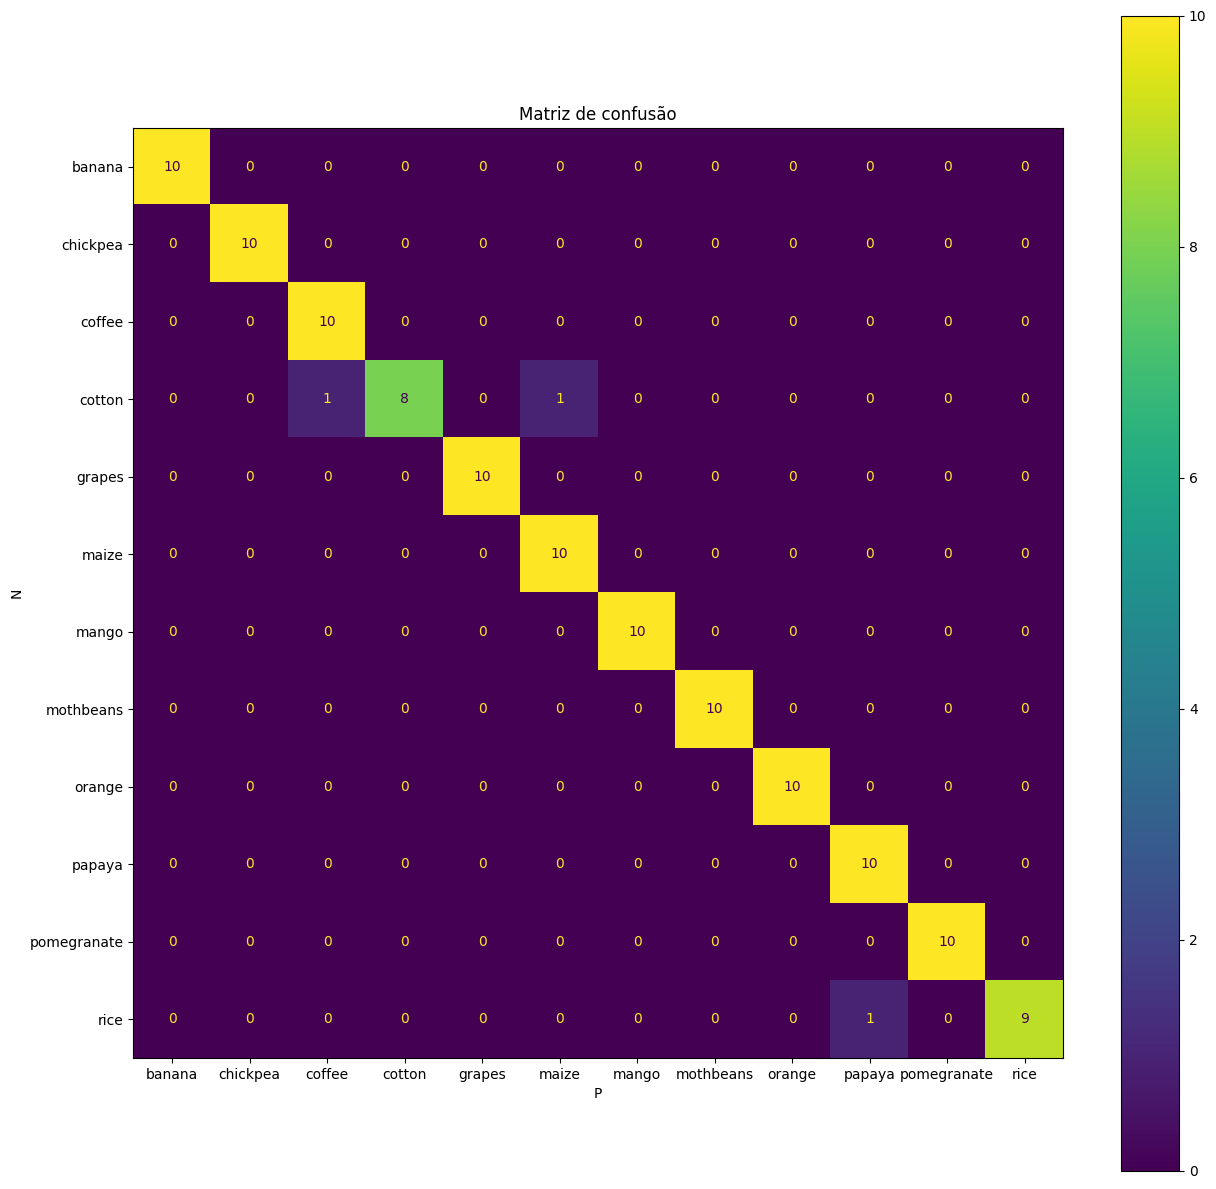

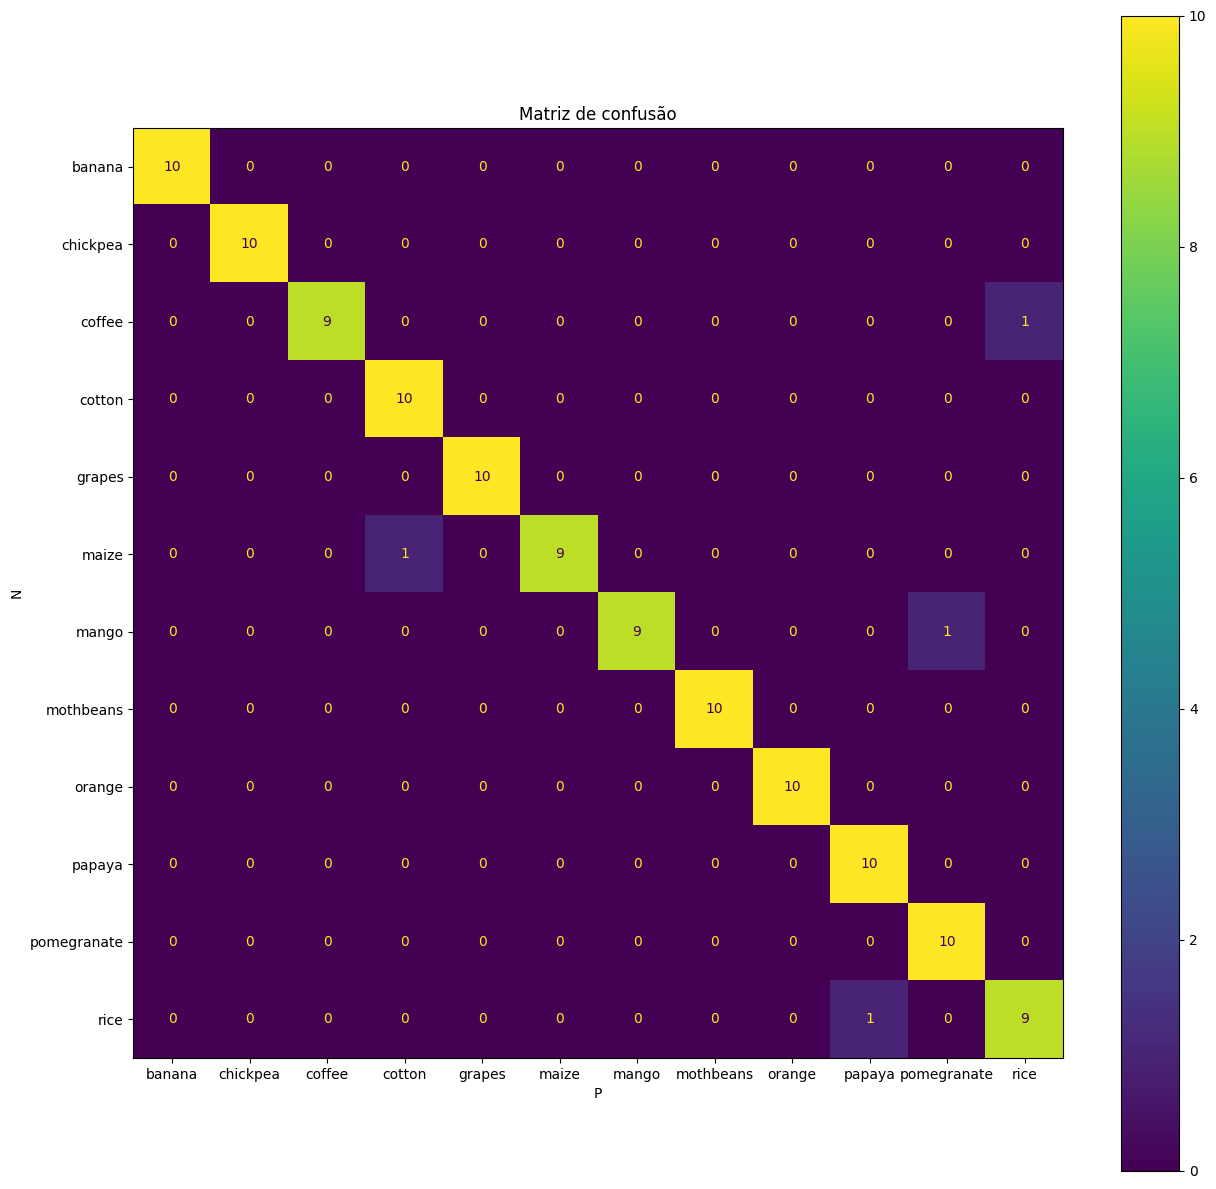

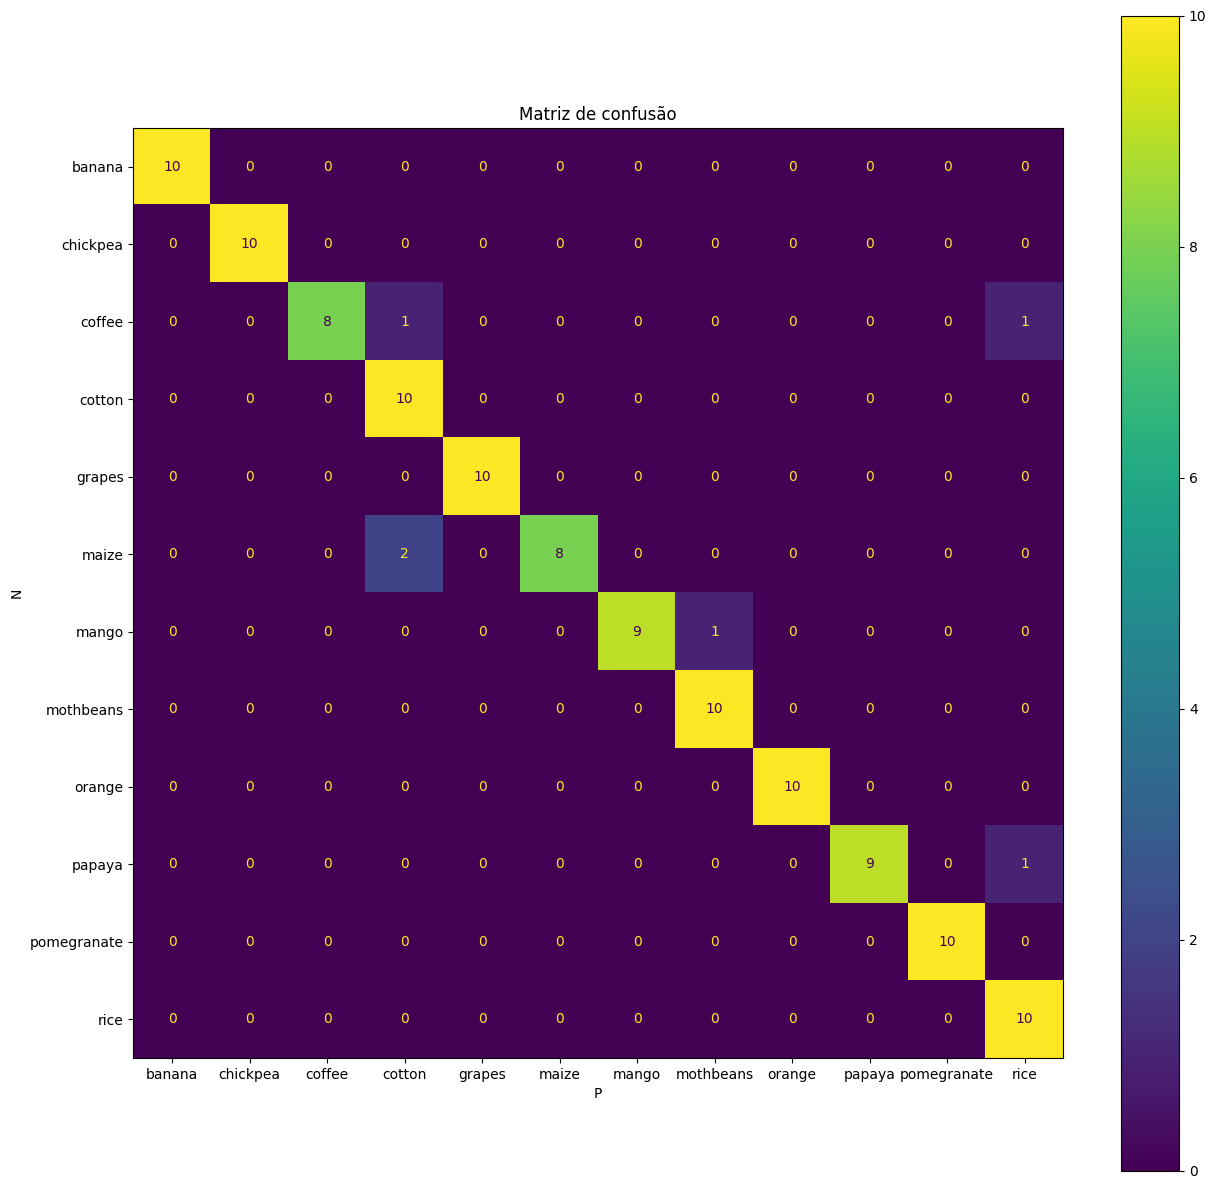

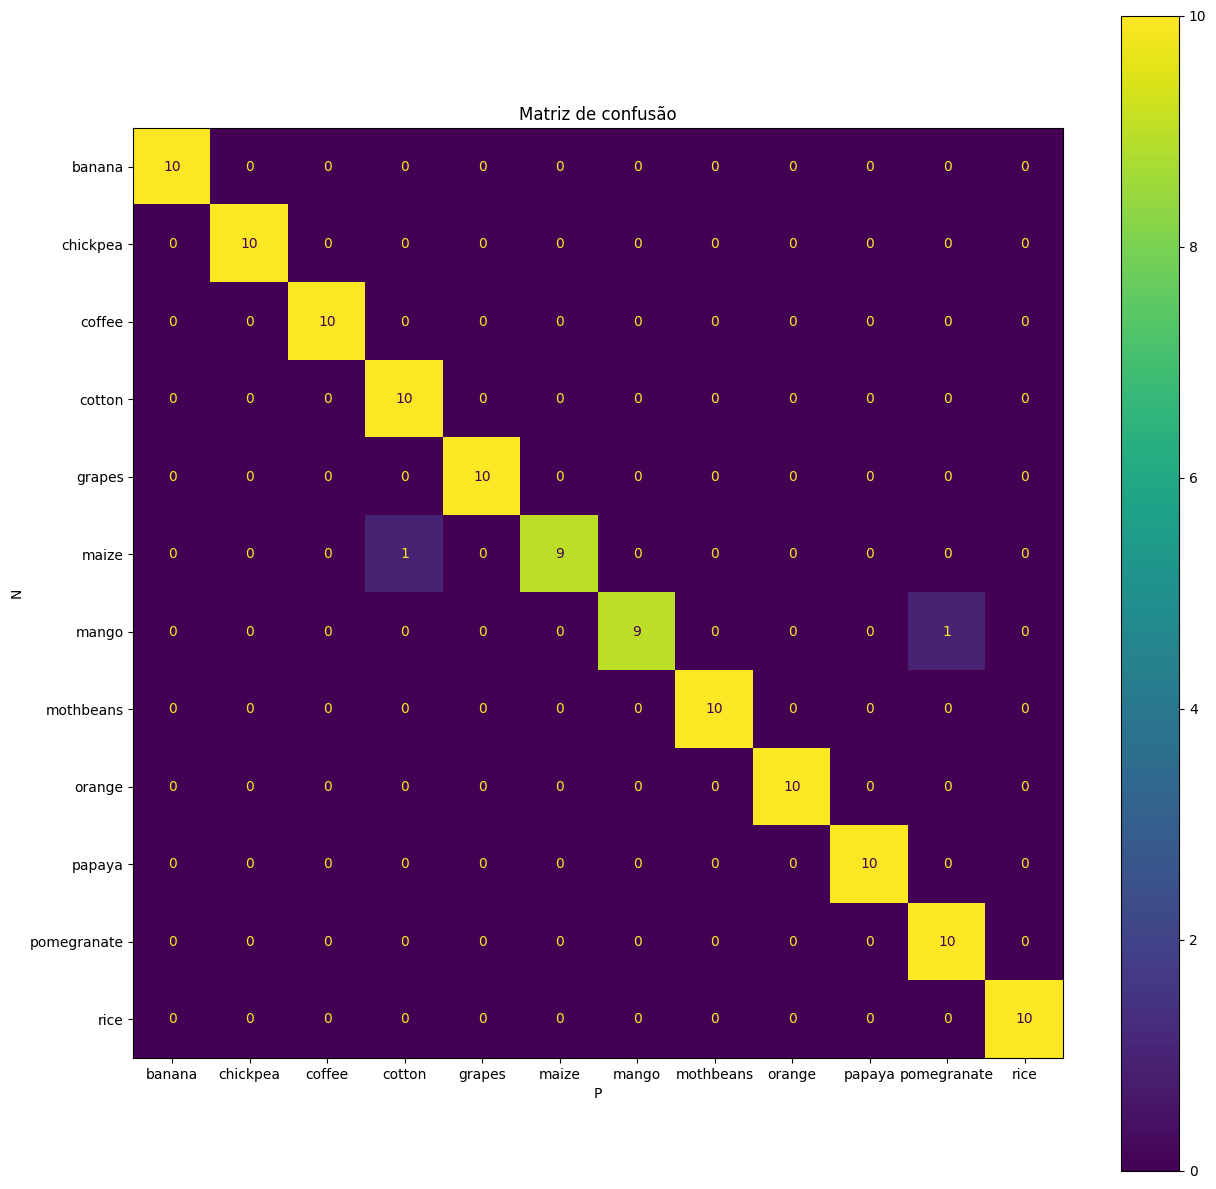

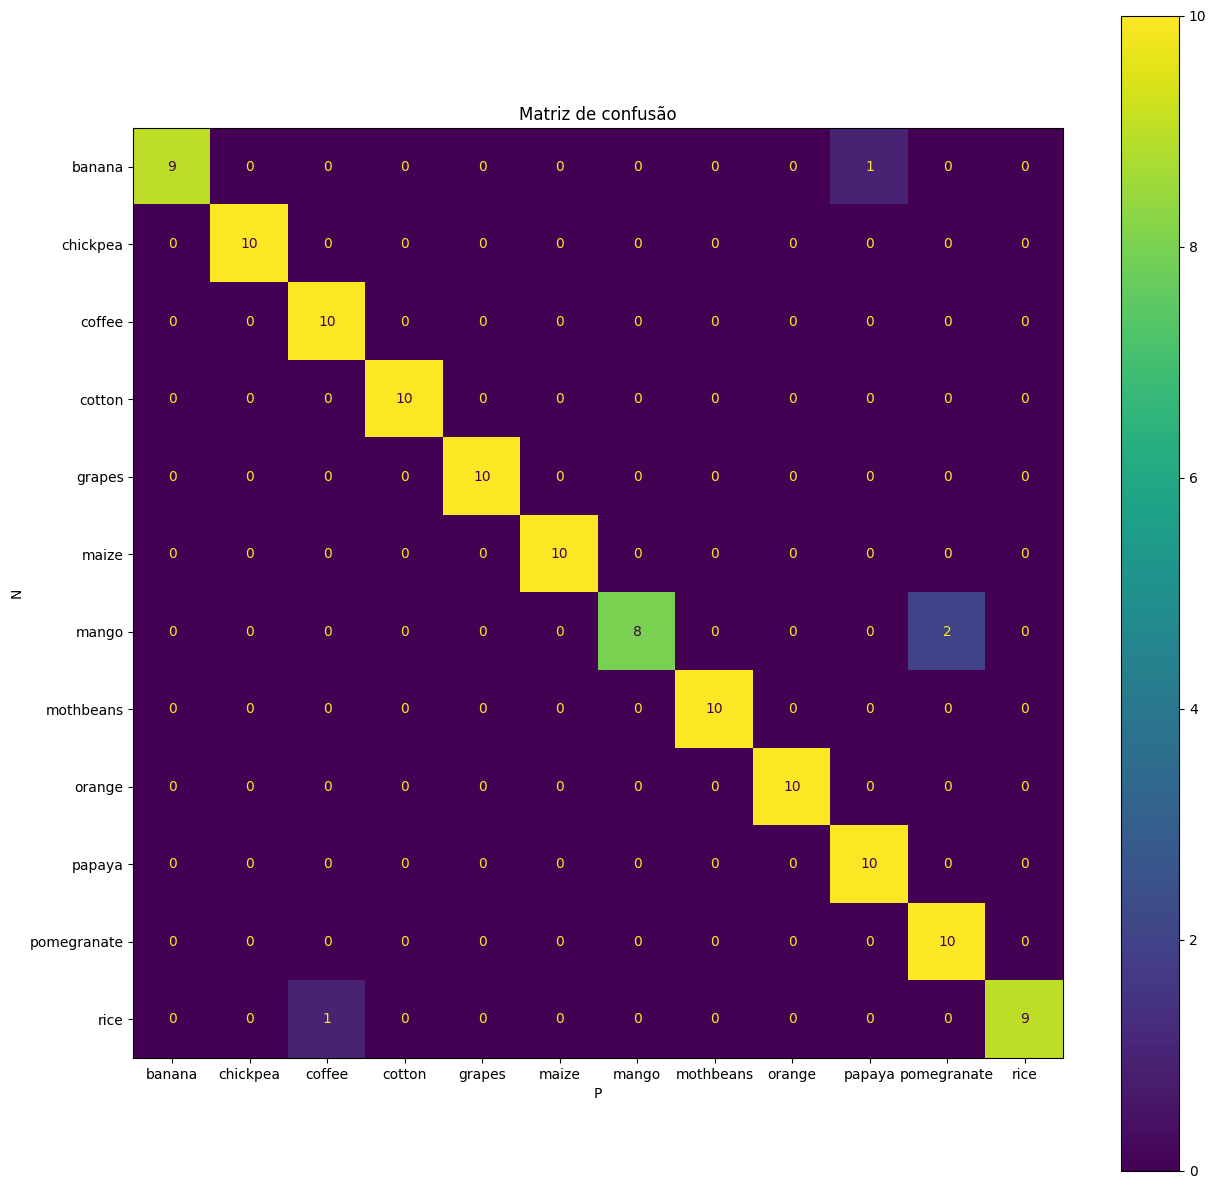

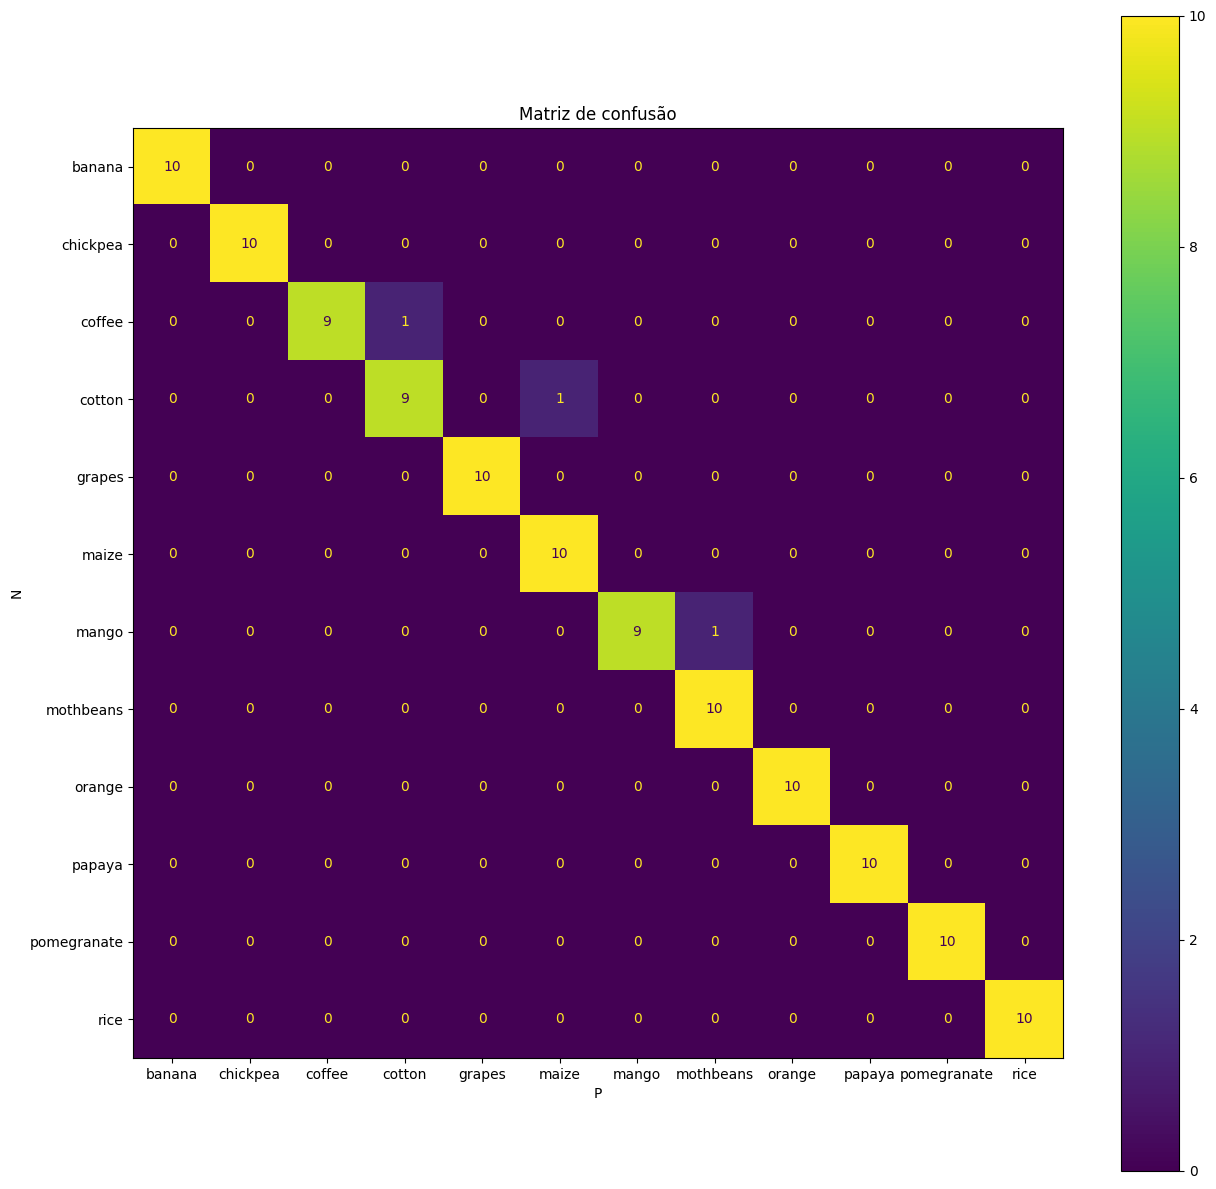

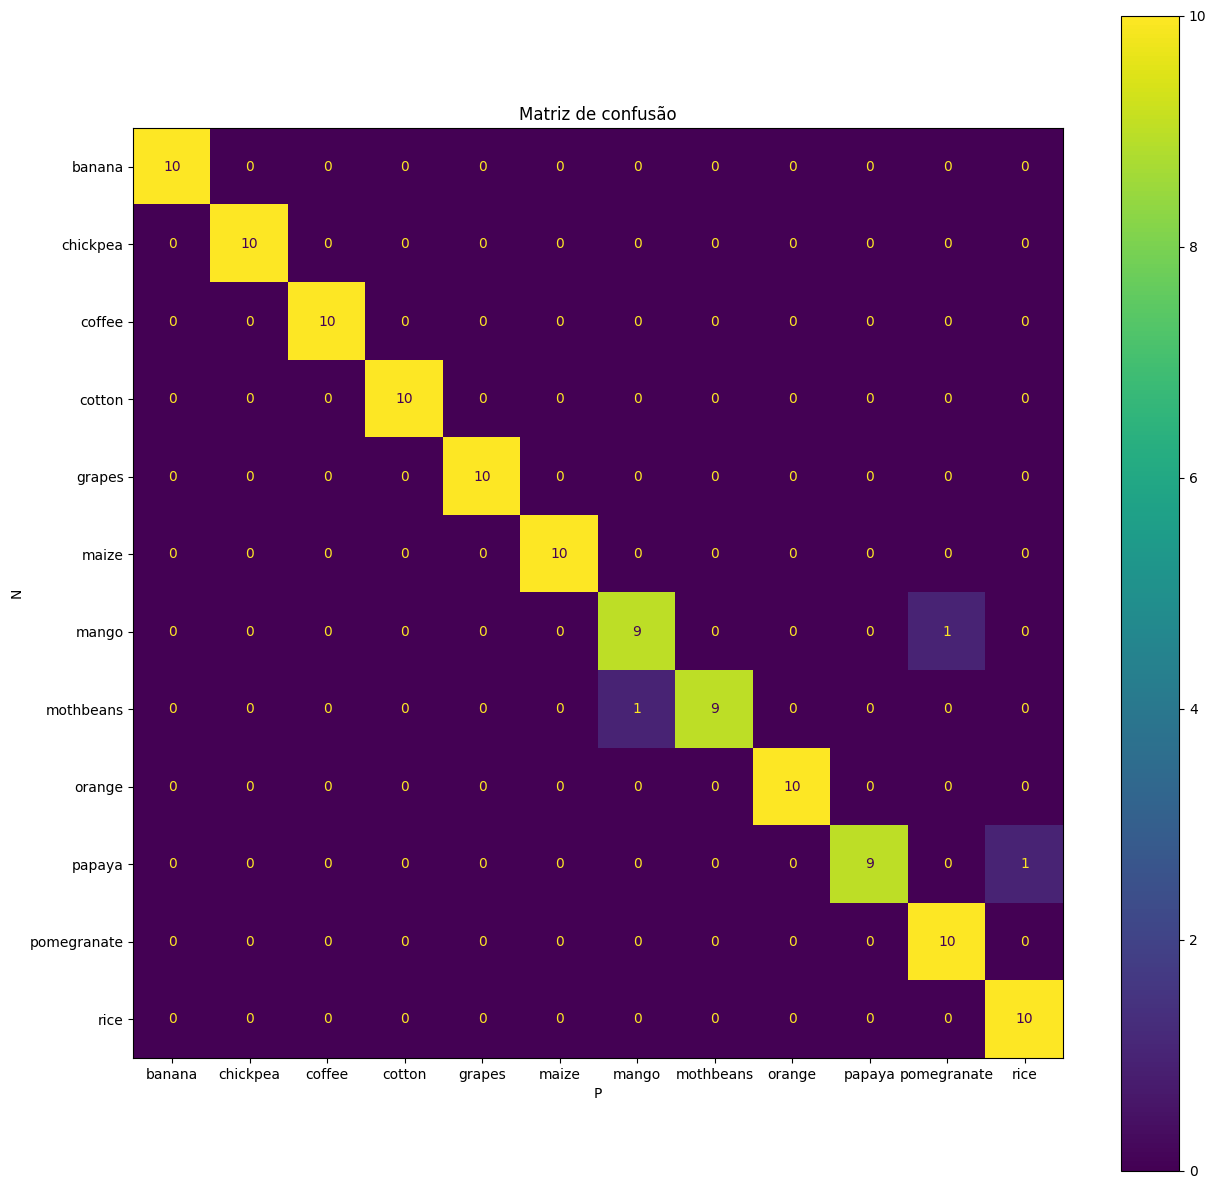

In [37]:


for fold, (train, test) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train], y[train])
    pred = clf.predict(X.iloc[test])
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ConfusionMatrixDisplay.from_predictions(y[test], pred, ax=ax)
    plt.title('Matriz de confusão')
    plt.xlabel('Classe verdadeira')
    plt.ylabel('Classe prevista')



# KNN regression


In [39]:
obj_columns = df.select_dtypes(['object']).columns
df_filter[obj_columns] = df_filter[obj_columns].apply(lambda x: pd.factorize(x)[0])
df_filter.describe()


X = df_filter.to_numpy()
y = df_filter.drop(columns = ['label']).to_numpy()
df_filter.head()

,N,P,K,label
0,90,42,43,0
1,85,58,41,0
2,60,55,44,0
3,74,35,40,0
4,78,42,42,0


In [40]:
clf = KNeighborsRegressor(n_neighbors=10)
kf = StratifiedKFold(n_splits=10, shuffle=True)

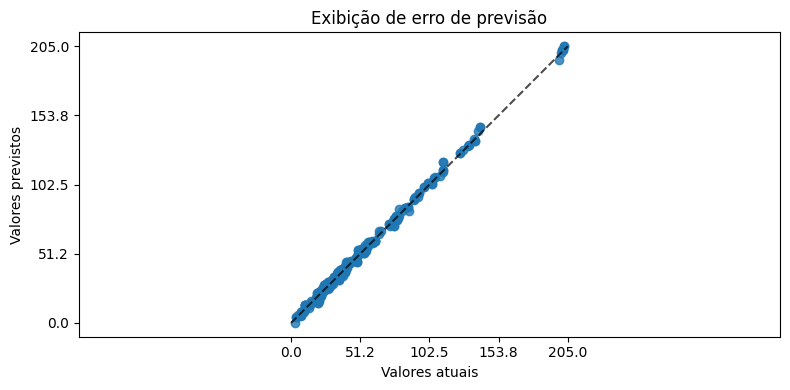

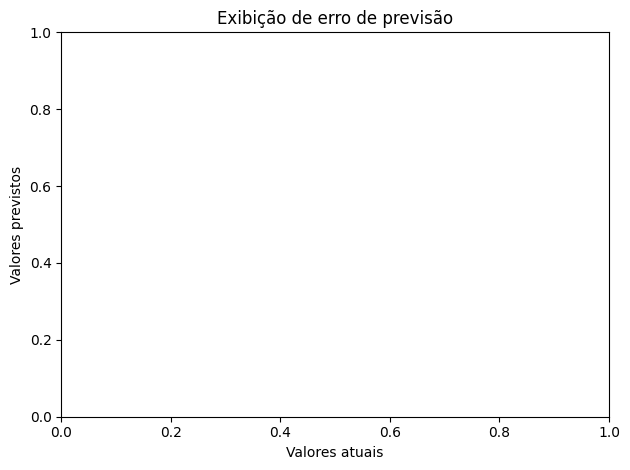

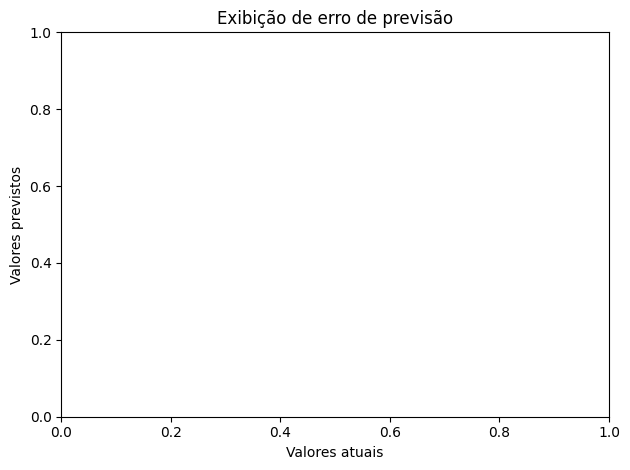

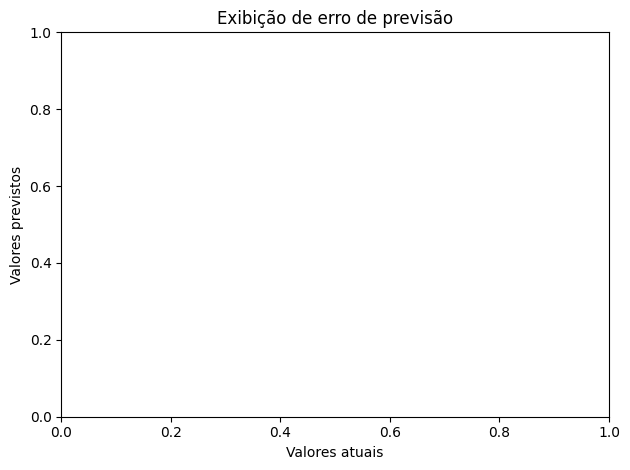

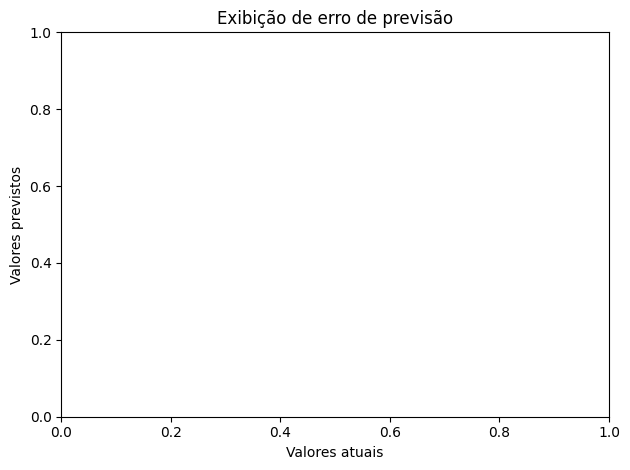

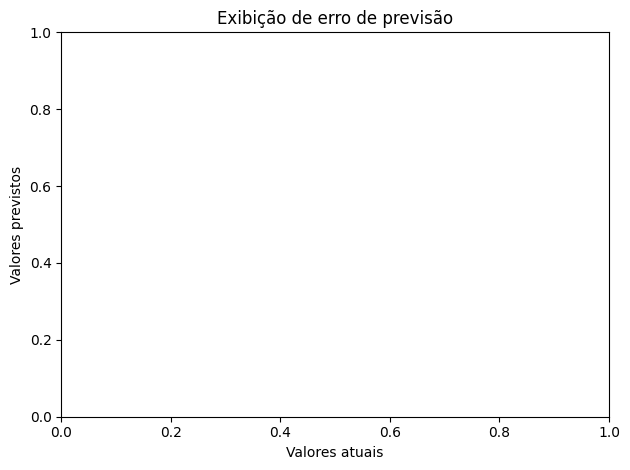

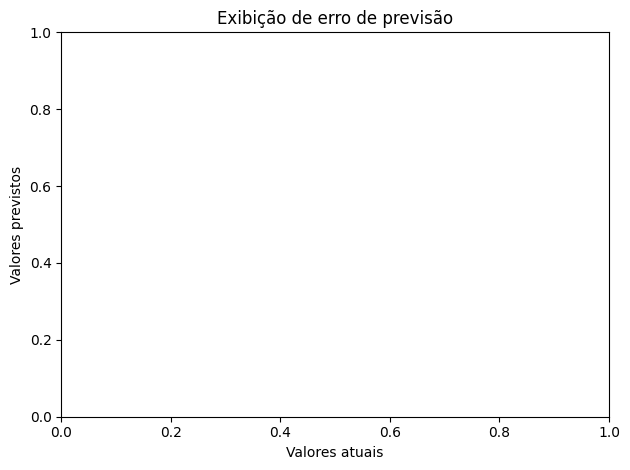

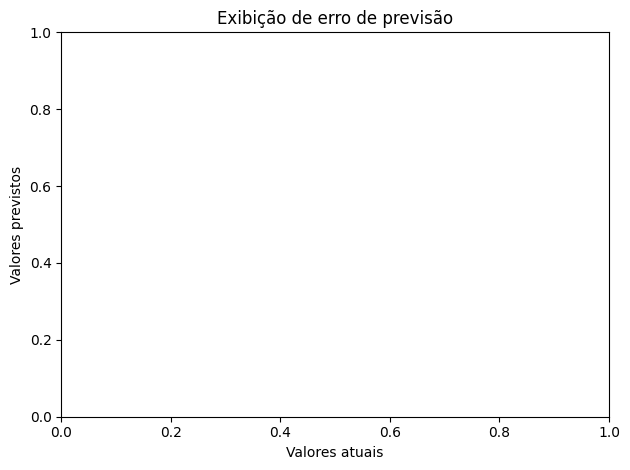

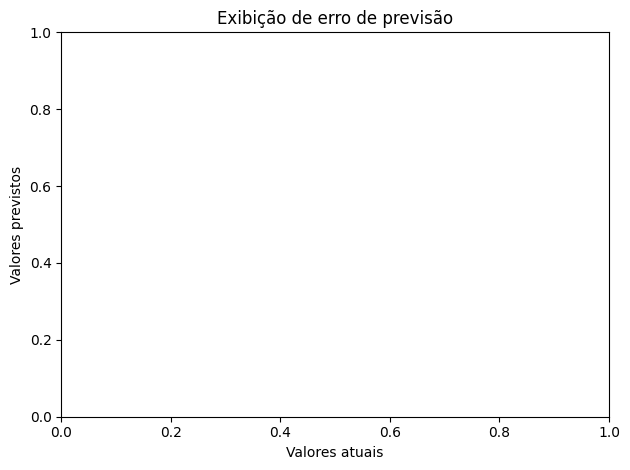

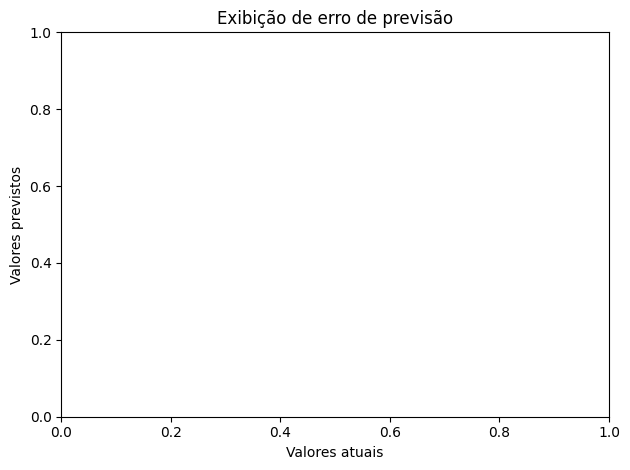

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))

for fold, (train, test) in enumerate(kf.split(X, y.argmax(1))): 
    clf.fit(X[train], y[train])    
    y_pred = clf.predict(X[test])
    PredictionErrorDisplay.from_predictions(
        y[test],
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=100,
        ax=ax,
        random_state=0,
    )
    plt.title('Exibição de erro de previsão')
    plt.xlabel('Valores atuais')
    plt.ylabel('Valores previstos')
    plt.tight_layout()
    plt.show()

In [25]:
clf.predict([[90,42,43,0]])

array([[88.6, 40.8, 41. ]])